## Predict the number row

In [23]:
import numpy as np
np.random.seed(2)

IN_DIM = 3
H_DIM = 10
OUT_DIM = 1

ALPHA = 0.01
NUM_EPOCHS = 2000

# [2.92, 3.56, 0.15, 5.11, 1.38, 4.44, 1.61, 4.11, 1.97, 4.50, 1.37, 5.08, 1.76, 5.19, 1.58]
dataset = [(np.array([[2.92, 3.56, 0.15]]), 5.11),
           (np.array([[3.56, 0.15, 5.11]]), 1.38),
           (np.array([[0.15, 5.11, 1.38]]), 4.44),
           (np.array([[5.11, 1.38, 4.44]]), 1.61),
           (np.array([[1.38, 4.44, 1.61]]), 4.11),
           (np.array([[4.44, 1.61, 4.11]]), 1.97),
           (np.array([[1.61, 4.11, 1.97]]), 4.50),
           (np.array([[4.11, 1.97, 4.50]]), 1.37),
           (np.array([[1.97, 4.50, 1.37]]), 5.08),
           (np.array([[4.50, 1.37, 5.08]]), 1.76)]


# dataset = [(np.array([[1, 2, 3]]), 4),
#            (np.array([[2, 3, 4]]), 5),
#            (np.array([[3, 4, 5]]), 6),
#            (np.array([[4, 5, 6]]), 7),
#            (np.array([[5, 6, 7]]), 8),
#            (np.array([[6, 7, 8]]), 9)]
# dataset = [(np.array([[0, 0]]), 0),
#            (np.array([[0, 1]]), 1),
#            (np.array([[1, 0]]), 1),
#            (np.array([[1, 1]]), 0)]


W1 = np.random.randn(IN_DIM, H_DIM)
W2 = np.random.randn(H_DIM, OUT_DIM)


In [24]:
# used to turn off some of the weights. resulting [0, inf]
def relu(s):
    return np.maximum(s, 0)


def relu_deriv(s):
    s[s <= 0] = 0
    s[s > 0] = 1
    return s


# used to predict probability. resulting [0, 1]
def sigmoid(s):
    return 1 / (1 + np.exp(-s))


def sigmoid_deriv(s):
    return s * (1 - s)


def predict(x):
    s1 = x.dot(W1)
    # h = relu(s1)
    h = sigmoid(s1)
    s2 = h.dot(W2)
    y = sigmoid(s2)
    return y


# learning

loss = []

for e in range(NUM_EPOCHS):
    # np.random.shuffle(dataset)
    for i in range(len(dataset)):
        x, result = dataset[i]

    # forward
        s1 = x.dot(W1)
        # h = relu(s1)
        h = sigmoid(s1)

        s2 = h.dot(W2)
        y = sigmoid(s2) * 10

    # mean squared error
        E = np.square(y - result)

    # backward - using the derevative (gradient) to know the direction to go to reduce the error
        ds2 = (y - result) * sigmoid_deriv(y / 10)
        dW2 = h.T.dot(ds2)

        dh = np.array(ds2).dot(W2.T)

        ds1 = dh * sigmoid_deriv(h)
        # ds1 = dh * relu_deriv(s1)
        dW1 = x.T.dot(ds1)

        # print('x', x)
        # print('W1', W1)
        # print('  s1', s1)
        # print('     h', h)
        # print('       W2', W2)
        # print('         s2', s2)
        # print('y', y)
        # print('        ds2', ds2)
        # print('      dW2', dW2)
        # print('     dh', dh)
        # print('  ds1', ds1)
        # print('dW1', dW1)
        # print('error:', E[0][0])

    # update weights
        W2 -= ALPHA * dW2
        W1 -= ALPHA * dW1

        loss.append(E[0][0])


In [8]:
# [2.92, 3.56, 0.15, 5.11, 1.38, 4.44, 1.61, 4.11, 1.97, 4.50, 1.37, 5.08, 1.76, 5.19, 1.58]
# x = np.array([1.37, 5.08, 1.76])
# x = np.array([5.08, 1.76, 5.19])
x = np.array([3.56, 0.15, 5.11])

probs = predict(x)
print('Predicted: ', probs * 10)


Predicted:  [1.27776084]


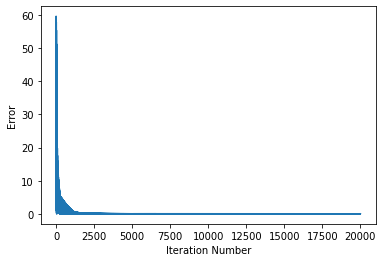

In [25]:
import matplotlib.pyplot as plt
plt.plot(loss)
plt.xlabel("Iteration Number")
plt.ylabel("Error")
plt.show()


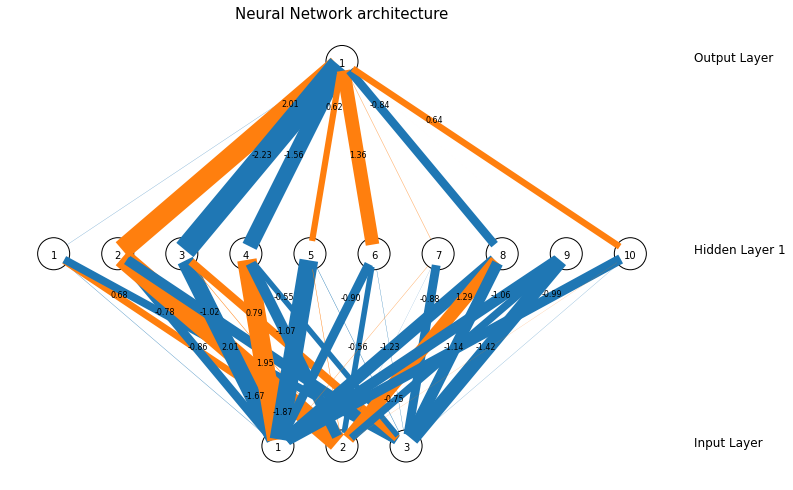

In [26]:
import VisualizeNN as VisNN

network = VisNN.DrawNN([IN_DIM, H_DIM, OUT_DIM], [W1, W2])
network.draw()
